In [39]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [11]:
from sklearn.datasets import make_circles

In [12]:
X,Y = make_circles(n_samples=1000, noise=.05)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

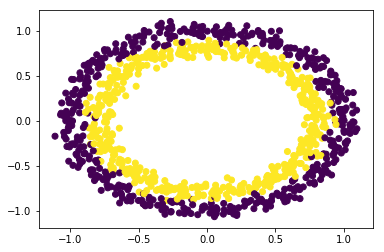

In [14]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
trainX,testX, trainY,testY = train_test_split(X,Y)

In [15]:
from sklearn.svm import SVC

In [16]:
svc = SVC(kernel='linear')

In [17]:
svc.fit(trainX,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
svc.score(testX,testY)

0.46400000000000002

In [19]:
svc = SVC(kernel='rbf')

In [20]:
svc.fit(trainX,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
svc.score(testX,testY)

0.96799999999999997

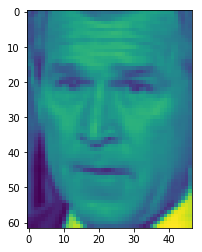

In [26]:
plt.imshow(faces.images[1])

In [28]:
faces.images.shape

(1348, 62, 47)

In [29]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'],
      dtype='<U17')

In [35]:
len(faces.target[(faces.target == 0)])

77

In [36]:
len(faces.target[(faces.target == 1)])

236

In [37]:
len(faces.target[(faces.target == 2)])

121

In [40]:
len(faces.target[(faces.target == 4)])

109

In [42]:
faces.images[0].shape

(62, 47)

In [43]:
62 * 47

2914

In [40]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [41]:
pca = PCA(n_components=150,  whiten=True)

In [42]:
svc = SVC(kernel='rbf', class_weight='balanced')

In [43]:
model = make_pipeline(pca,svc)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
faces.data.shape

(1348, 2914)

In [46]:
trainX, testX, trainY, testY = train_test_split(faces.data, faces.target)

In [47]:
from sklearn.grid_search import  GridSearchCV

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [48]:
model

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [50]:
params = {
    'pca__whiten':[True],
    'svc__C':[5],
    'svc__gamma':[0.0005]
}

In [51]:
grid = GridSearchCV(model, params, n_jobs=-1)

In [52]:
grid.fit(trainX,trainY)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'svc__gamma': [0.0005], 'svc__C': [5], 'pca__whiten': [True]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [78]:
grid.score(testX,testY)

0.83086053412462912

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_rbf_parameters_001.png">

In [79]:
grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.0005}

In [82]:
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [85]:
pca.transform(faces.data[:1])

array([[  1.29014933e+00,   8.12017381e-01,   1.15691888e+00,
          4.88551140e-01,   1.09095001e+00,  -3.52214664e-01,
         -3.65192205e-01,   1.08934772e+00,  -9.48902190e-01,
          4.56374049e-01,  -8.15859795e-01,  -8.88010442e-01,
          9.05632079e-01,  -1.11057445e-01,   2.87769228e-01,
         -1.24804723e+00,   3.57414663e-01,  -2.90753514e-01,
         -2.04849452e-01,   7.61522174e-01,   1.08023643e+00,
          4.11419570e-02,  -5.27918385e-03,   4.15077895e-01,
          5.48232086e-02,   3.38780344e-01,   1.35610695e-03,
          6.05565131e-01,   6.67671978e-01,   6.18340299e-02,
         -3.97676051e-01,  -8.88850570e-01,  -1.03394759e+00,
         -7.07961023e-01,   3.38042647e-01,  -8.25723529e-01,
         -9.47735667e-01,  -2.15116069e-01,   9.89172906e-02,
         -1.00593805e-01,  -4.07668740e-01,   1.46486568e+00,
          7.50628591e-01,  -1.86413750e-01,   3.41081649e-01,
         -2.67034948e-01,   5.58049083e-01,   1.29569566e+00,
        

In [86]:
from sklearn.model_selection import cross_val_score

In [97]:
cv = cross_val_score(X=testX,y=testY, cv=5, estimator=model)

In [98]:
import numpy as np
np.mean(cv)

0.60747407797946318

In [2]:
import numpy as np
features = np.random.randn(200, 2)

In [3]:
target_xor = np.logical_xor(features[:, 0] > 0, features[:, 1] > 0)
target = np.where(target_xor, 0, 1)

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

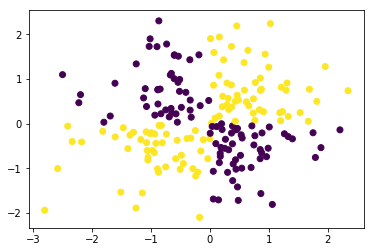

In [6]:
plt.scatter(features[:,0], features[:,1], c=target)

In [7]:
from sklearn.svm import SVC

In [8]:
help(SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

In [15]:
clf = SVC(kernel='linear')

In [17]:
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
clf.score(X,Y)

0.504

In [28]:
clf_poly = SVC(kernel='poly',degree=2)

In [29]:
clf_poly.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
clf.score(X,Y)

0.96999999999999997

In [33]:
clf_rbf = SVC(kernel='rbf')

In [24]:
clf.fit(X,Y)
clf.score(X,Y)

0.96899999999999997

In [30]:
clf_poly.fit(features,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
clf_poly.score(features,target)

0.94999999999999996

In [34]:
clf_rbf = SVC(kernel='rbf')

In [35]:
clf_rbf.fit(features,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
clf_rbf.score(features,target)

0.95499999999999996

In [37]:
clf_rbf.support_vectors_

array([[  4.52369951e-01,  -1.35535011e-01],
       [ -8.68123769e-01,   2.29844734e+00],
       [ -1.86909723e-01,   1.53765542e+00],
       [  3.66329814e-01,  -2.13956285e-01],
       [  1.75069036e+00,  -2.06854544e-01],
       [  2.20798247e+00,  -1.41646795e-01],
       [  1.32843738e+00,  -2.92654402e-01],
       [ -3.18296932e-01,   1.41171343e-01],
       [ -5.53285355e-01,   2.99208943e-02],
       [  3.83224715e-01,  -5.49817938e-02],
       [  4.67469797e-01,  -1.10732337e-01],
       [ -1.69284022e+00,   1.67829286e-01],
       [  1.45046399e-01,  -1.70989298e+00],
       [ -2.03732602e-02,   5.15700837e-01],
       [  7.12105033e-01,  -5.34472384e-02],
       [ -6.47452505e-01,   2.30776907e-01],
       [ -5.76590858e-01,   2.16623029e-01],
       [ -1.65520953e-01,   3.99772123e-01],
       [  8.84612980e-01,  -2.10925423e-01],
       [  5.73945380e-02,  -1.69069116e+00],
       [  1.00435113e-01,  -4.50002608e-01],
       [  4.03863953e-03,  -2.18984265e-01],
       [ -

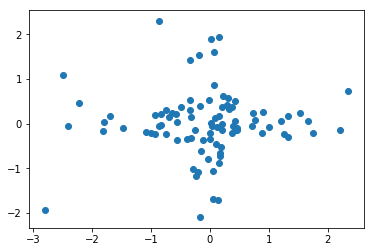

In [38]:
plt.scatter(clf_rbf.support_vectors_[:,0], clf_rbf.support_vectors_[:,1])

In [65]:
grid.best_estimator_.steps[1][1].support_vectors_.shape

(971, 150)

In [62]:
svc

('svc', SVC(C=5, cache_size=200, class_weight='balanced', coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False))